#### Overview of Sale Price

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
train = pd.read_csv('../data/train.csv')

# Basic info
print(f"Dataset Shape: {train.shape}")
print(f"\nTarget Variable - SalePrice Statistics:")
print(train['SalePrice'].describe())
print(f"\nData Types Summary:")
print(train.dtypes.value_counts())

train.head()

Dataset Shape: (1460, 81)

Target Variable - SalePrice Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Data Types Summary:
object     43
int64      35
float64     3
Name: count, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Missing Value Analysis

Features with missing values: 19

Top 10 features with most missing data:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64


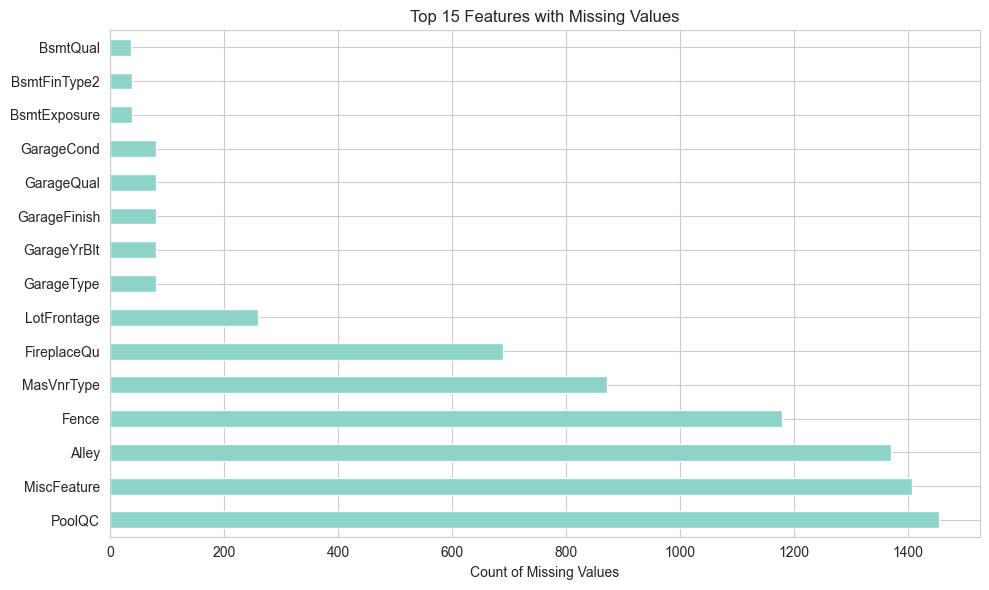

In [5]:
# Missing values analysis
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print(f"Features with missing values: {len(missing)}")
print(f"\nTop 10 features with most missing data:")
print(missing.head(10))

# Visualize
plt.figure(figsize=(10, 6))
missing.head(15).plot(kind='barh')
plt.title('Top 15 Features with Missing Values')
plt.xlabel('Count of Missing Values')
plt.tight_layout()
plt.show()

high missing rate in misc Features and pool (about 90 percent missing)  meaning these services aren't much available

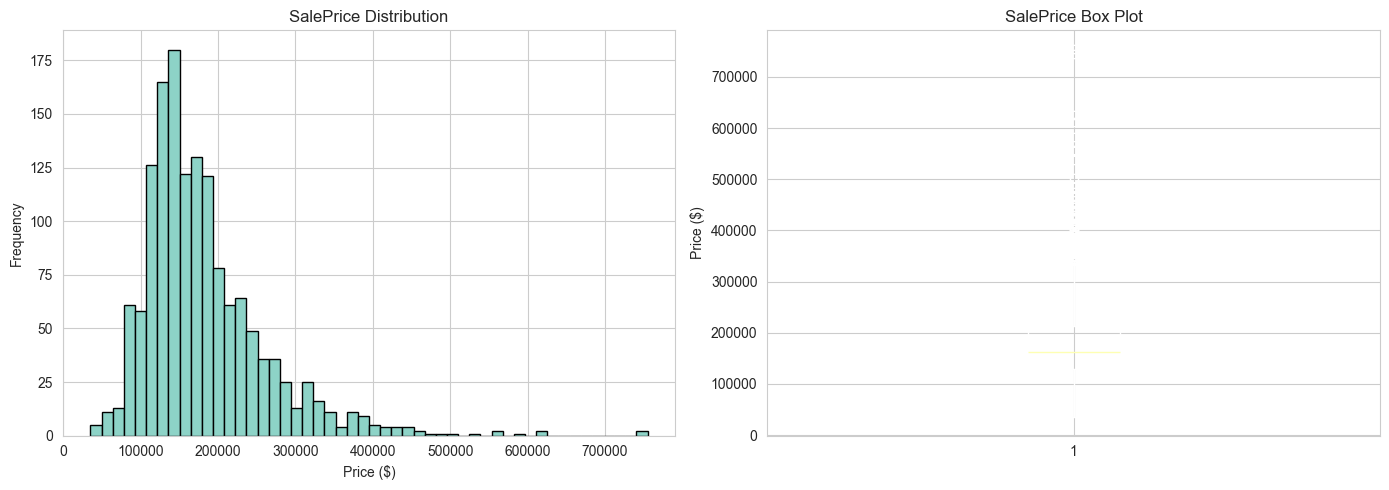

Skewness: 1.88


In [6]:
# SalePrice distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train['SalePrice'], bins=50, edgecolor='black')
axes[0].set_title('SalePrice Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(train['SalePrice'])
axes[1].set_title('SalePrice Box Plot')
axes[1].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

print(f"Skewness: {train['SalePrice'].skew():.2f}")

Highly rightskewed. High-Price properties get in anomalies. as data is skewed heavily (about 2) suggests log transformation is required.

Top 10 features most correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


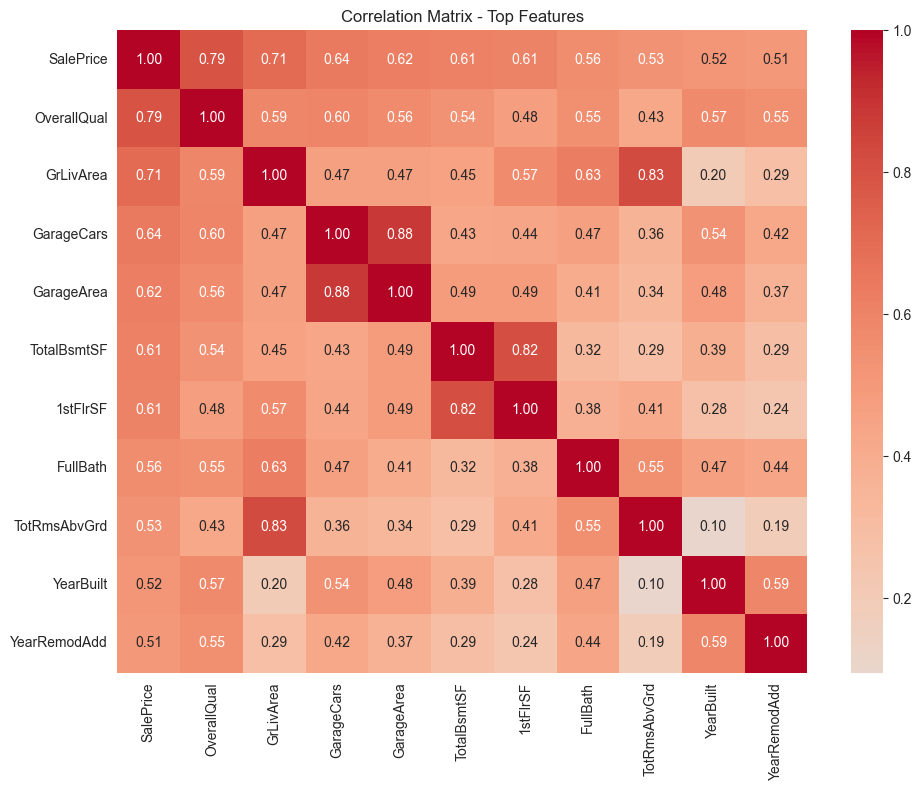

In [7]:
# Select numerical features only
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('Id')  # Remove ID column

# Correlation with SalePrice
correlations = train[numerical_features].corr()['SalePrice'].sort_values(ascending=False)

print("Top 10 features most correlated with SalePrice:")
print(correlations.head(11))  # 11 because SalePrice itself is included

# Heatmap of top correlated features
top_features = correlations.head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Top Features')
plt.tight_layout()
plt.show()

Top 10 POSITIVE correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Top 10 NEGATIVE correlations with SalePrice:
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Top 10 by ABSOLUTE correlation strength:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.

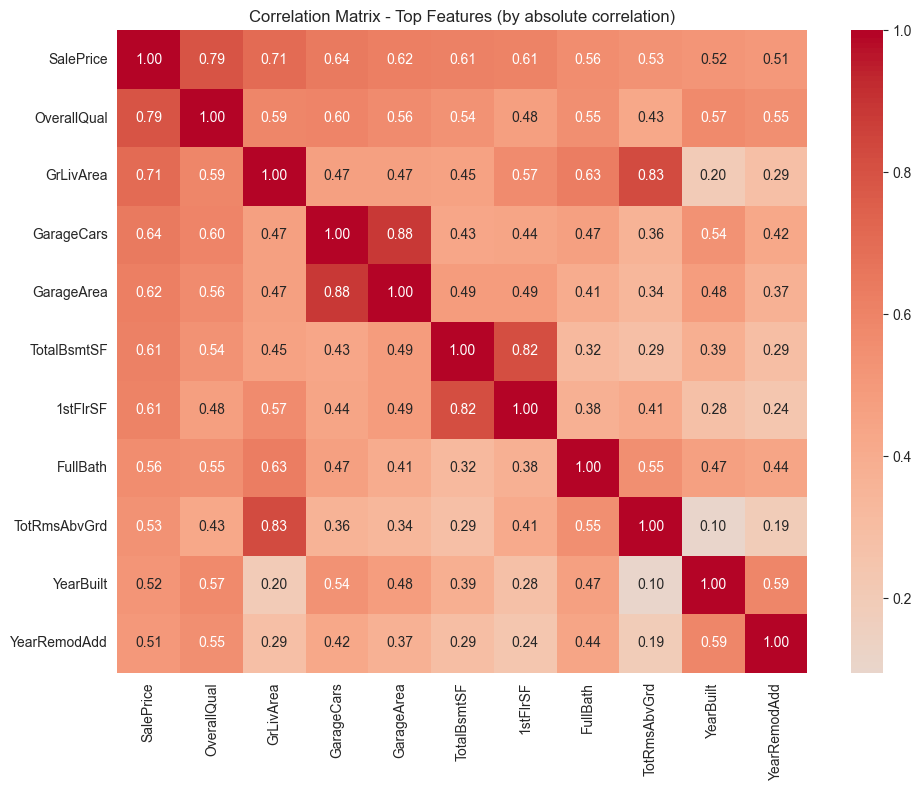

In [8]:
# Correlation with SalePrice
correlations = train[numerical_features].corr()['SalePrice'].sort_values(ascending=False)

print("Top 10 POSITIVE correlations with SalePrice:")
print(correlations.head(11))

print("\nTop 10 NEGATIVE correlations with SalePrice:")
print(correlations.tail(10))

print("\nTop 10 by ABSOLUTE correlation strength:")
abs_corr = correlations.abs().sort_values(ascending=False)
print(abs_corr.head(11))

# Visualize top absolute correlations
top_features = abs_corr.head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Top Features (by absolute correlation)')
plt.tight_layout()
plt.show()

In [9]:
# Selected features for modeling (avoiding multicollinearity)
selected_features = [
    'OverallQual',    # Quality (0.79)
    'GrLivArea',      # Living area (0.71)
    'GarageCars',     # Garage (0.64) - chosen over GarageArea
    'TotalBsmtSF',    # Basement (0.61)
    '1stFlrSF',       # First floor (0.61)
    'FullBath',       # Bathrooms (0.56)
    'YearBuilt'       # Age (0.52)
]

# Check for missing values in selected features
print("Missing values in selected features:")
print(train[selected_features].isnull().sum())

# Basic stats
print("\nSelected features summary:")
train[selected_features].describe()

Missing values in selected features:
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
1stFlrSF       0
FullBath       0
YearBuilt      0
dtype: int64

Selected features summary:


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,1057.429452,1162.626712,1.565068,1971.267808
std,1.382997,525.480383,0.747315,438.705324,386.587738,0.550916,30.202904
min,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,1872.000000
25%,5.000000,1129.500000,1.000000,795.750000,882.000000,1.000000,1954.000000
50%,6.000000,1464.000000,2.000000,991.500000,1087.000000,2.000000,1973.000000
75%,7.000000,1776.750000,2.000000,1298.250000,1391.250000,2.000000,2000.000000
max,10.000000,5642.000000,4.000000,6110.000000,4692.000000,3.000000,2010.000000


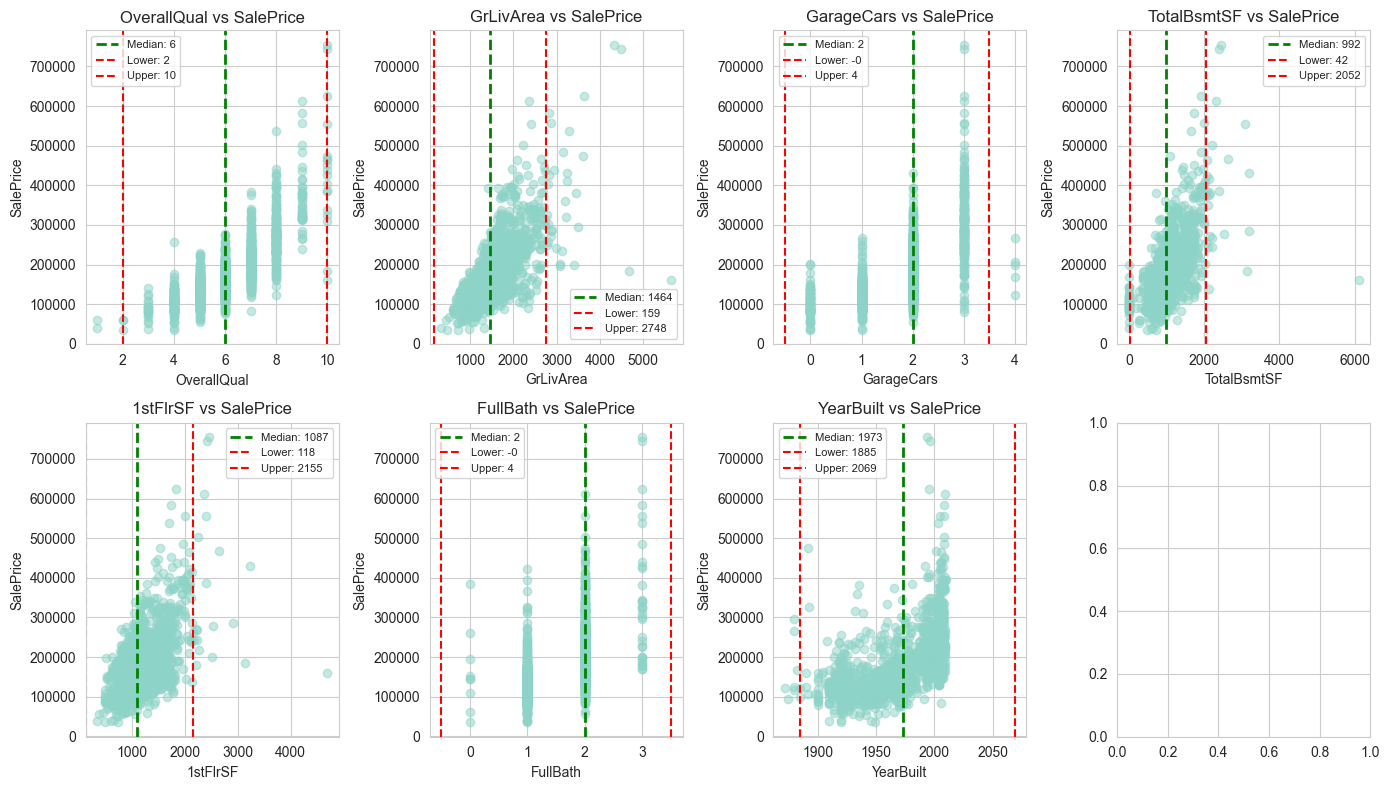


Potential outliers (GrLivArea > 4000 with low price):
      GrLivArea  SalePrice
523        4676     184750
1298       5642     160000


In [10]:
# Visualize outliers with threshold lines
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
axes = axes.flatten()

for idx, feature in enumerate(selected_features):
    ax = axes[idx]

    # Scatter plot
    ax.scatter(train[feature], train['SalePrice'], alpha=0.5)

    # Calculate IQR bounds for outlier detection
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = train[feature].median()

    # Draw threshold lines
    ax.axvline(median, color='green', linestyle='--', linewidth=2, label=f'Median: {median:.0f}')
    ax.axvline(lower_bound, color='red', linestyle='--', linewidth=1.5, label=f'Lower: {lower_bound:.0f}')
    ax.axvline(upper_bound, color='red', linestyle='--', linewidth=1.5, label=f'Upper: {upper_bound:.0f}')

    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'{feature} vs SalePrice')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Identify extreme outliers
print("\nPotential outliers (GrLivArea > 4000 with low price):")
outliers = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]
print(outliers[['GrLivArea', 'SalePrice']])

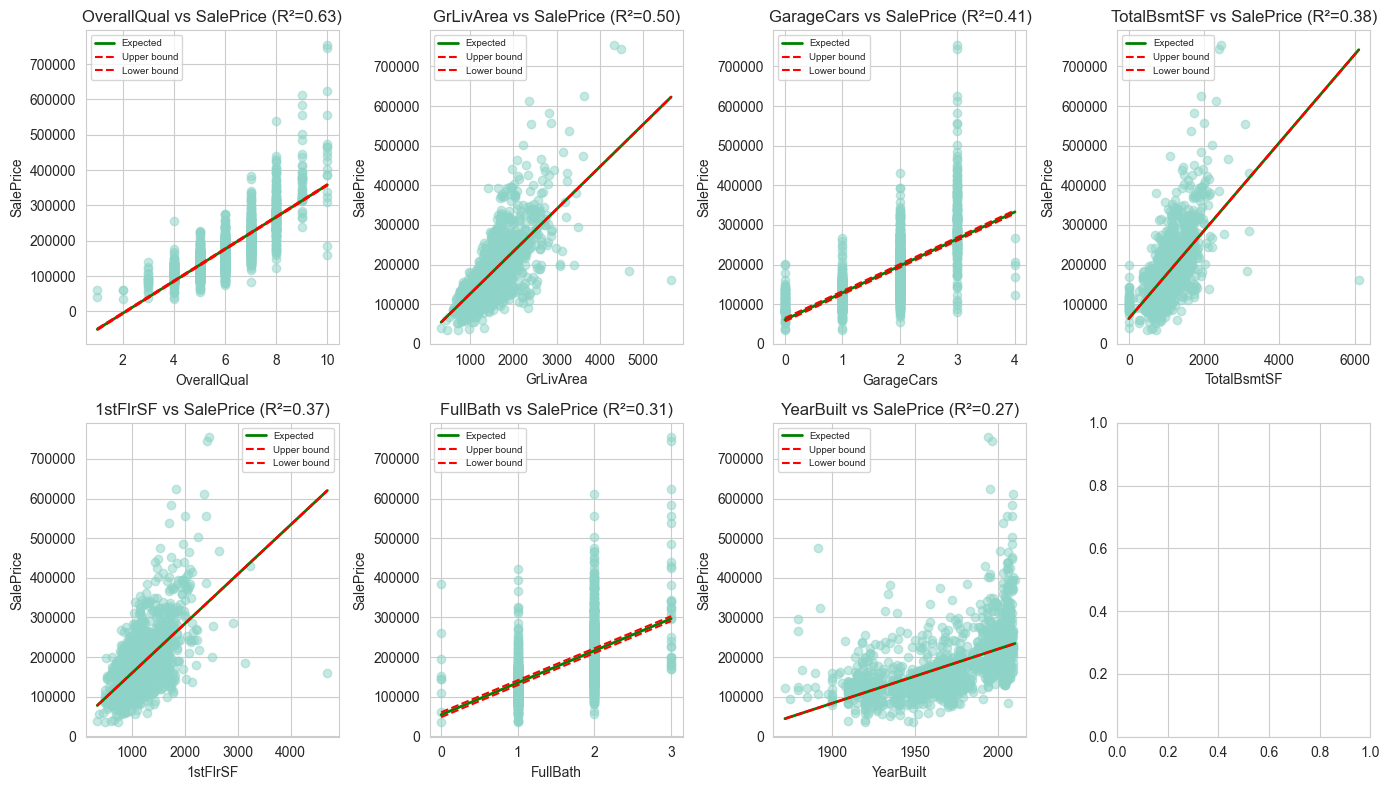


Outliers beyond prediction bounds:
      GrLivArea  SalePrice
523        4676     184750
1298       5642     160000


In [11]:
from scipy import stats

# Visualize with regression lines and confidence intervals
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
axes = axes.flatten()

for idx, feature in enumerate(selected_features):
    ax = axes[idx]

    x = train[feature].values
    y = train['SalePrice'].values

    # Scatter plot
    ax.scatter(x, y, alpha=0.5)

    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Generate regression line
    x_line = np.linspace(x.min(), x.max(), 100)
    y_pred = slope * x_line + intercept

    # Calculate prediction interval (95% confidence)
    predict_std = np.sqrt(std_err**2 * (1 + 1/len(x)))
    margin = 1.96 * predict_std * np.sqrt(1 + (x_line - x.mean())**2 / np.sum((x - x.mean())**2))

    # Plot lines
    ax.plot(x_line, y_pred, 'g-', linewidth=2, label='Expected')
    ax.plot(x_line, y_pred + margin, 'r--', linewidth=1.5, label='Upper bound')
    ax.plot(x_line, y_pred - margin, 'r--', linewidth=1.5, label='Lower bound')

    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'{feature} vs SalePrice (R²={r_value**2:.2f})')
    ax.legend(fontsize=7)

plt.tight_layout()
plt.show()

print("\nOutliers beyond prediction bounds:")
outliers = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]
print(outliers[['GrLivArea', 'SalePrice']])

Original: 1460 samples
After removing outliers: 1458 samples

Skewness before: 1.88
Skewness after log: 0.12


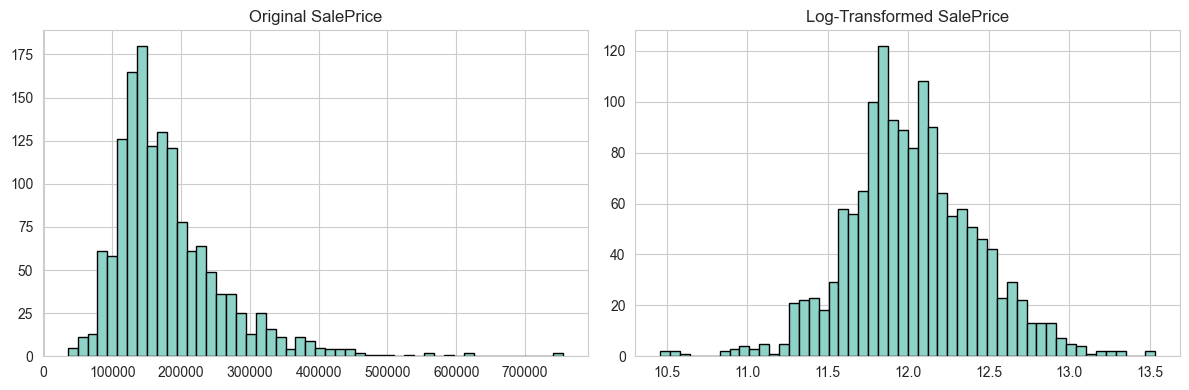


Final shapes: X=(1458, 7), y=(1458,)


In [12]:
# Remove identified outliers
outlier_indices = [523, 1298]
train_clean = train.drop(outlier_indices).copy()

print(f"Original: {len(train)} samples")
print(f"After removing outliers: {len(train_clean)} samples")

# Apply log transformation to SalePrice
train_clean['SalePrice_log'] = np.log(train_clean['SalePrice'])

# Compare skewness
print(f"\nSkewness before: {train['SalePrice'].skew():.2f}")
print(f"Skewness after log: {train_clean['SalePrice_log'].skew():.2f}")

# Visualize improvement
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(train['SalePrice'], bins=50, edgecolor='black')
axes[0].set_title('Original SalePrice')
axes[1].hist(train_clean['SalePrice_log'], bins=50, edgecolor='black')
axes[1].set_title('Log-Transformed SalePrice')
plt.tight_layout()
plt.show()

# Final dataset
X = train_clean[selected_features].values
y = train_clean['SalePrice_log'].values

print(f"\nFinal shapes: X={X.shape}, y={y.shape}")

here log transformation for skewness is used to reduce the skewness and find ultimate trend

In [13]:
from sklearn.model_selection import train_test_split

# Split: 75% train, 15% validation, 10% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.167, random_state=42)
# 0.167 of 90% ≈ 15% of total

print(f"Train: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Val:   {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test:  {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Feature scaling (standardization: mean=0, std=1)
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train - X_mean) / X_std
X_val_scaled = (X_val - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

print(f"\nScaled train - Mean: {X_train_scaled.mean(axis=0).round(3)}")
print(f"Scaled train - Std: {X_train_scaled.std(axis=0).round(3)}")

print("\n✓ Days 1-2 Complete! Data ready for Week 2 modeling.")

Train: 1092 samples (74.9%)
Val:   220 samples (15.1%)
Test:  146 samples (10.0%)

Scaled train - Mean: [ 0.  0.  0.  0. -0. -0.  0.]
Scaled train - Std: [1. 1. 1. 1. 1. 1. 1.]

✓ Days 1-2 Complete! Data ready for Week 2 modeling.


In [15]:
# Import the class
import sys
sys.path.append('../src')
from linear_regression import LinearRegressionScratch

print("✓ LinearRegressionScratch imported successfully")


✓ LinearRegressionScratch imported successfully


In [16]:
# Cell 10: Train the model
model = LinearRegressionScratch(learning_rate=0.01, n_iterations=1000)

print("Training Linear Regression from scratch...")
print("-" * 50)
model.fit(X_train_scaled, y_train)

print("\n" + "="*50)
print("✓ Training complete!")
print(f"Final weights: {model.weights.round(3)}")
print(f"Final bias: {model.bias:.3f}")

Training Linear Regression from scratch...
--------------------------------------------------
Iteration 100/1000, Cost: 9.9059
Iteration 200/1000, Cost: 1.3382
Iteration 300/1000, Cost: 0.1900
Iteration 400/1000, Cost: 0.0360
Iteration 500/1000, Cost: 0.0153
Iteration 600/1000, Cost: 0.0124
Iteration 700/1000, Cost: 0.0120
Iteration 800/1000, Cost: 0.0120
Iteration 900/1000, Cost: 0.0119
Iteration 1000/1000, Cost: 0.0119

✓ Training complete!
Final weights: [ 0.131  0.143  0.051  0.066  0.014 -0.017  0.079]
Final bias: 12.030


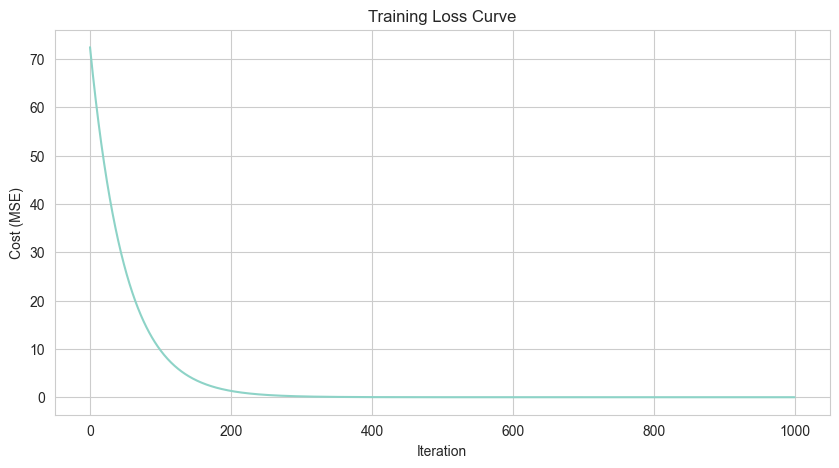

Initial cost: 72.4410
Final cost: 0.0119
Cost reduction: 99.98%


In [17]:
# Plot cost history
plt.figure(figsize=(10, 5))
plt.plot(model.cost_history)
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

print(f"Initial cost: {model.cost_history[0]:.4f}")
print(f"Final cost: {model.cost_history[-1]:.4f}")
print(f"Cost reduction: {(1 - model.cost_history[-1]/model.cost_history[0])*100:.2f}%")


In [21]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

# Calculate R² scores
train_r2 = model.score(X_train_scaled, y_train)
val_r2 = model.score(X_val_scaled, y_val)

print(f"Training R²: {train_r2:.4f}")
print(f"Validation R²: {val_r2:.4f}")
print(f"Difference: {abs(train_r2 - val_r2):.4f}")

if abs(train_r2 - val_r2) < 0.05:
    print("✓ Good generalization - no overfitting")
else:
    print("⚠ Possible overfitting")

Training R²: 0.8449
Validation R²: 0.8484
Difference: 0.0035
✓ Good generalization - no overfitting


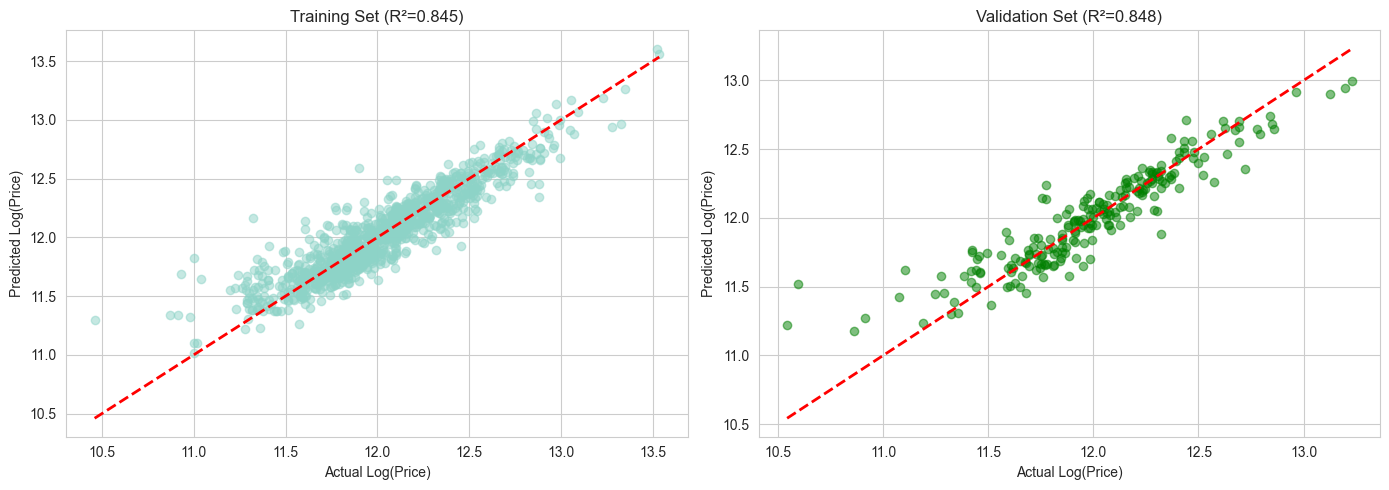

In [22]:
# Plot actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Log(Price)')
axes[0].set_ylabel('Predicted Log(Price)')
axes[0].set_title(f'Training Set (R²={train_r2:.3f})')
axes[0].grid(True)

# Validation set
axes[1].scatter(y_val, y_val_pred, alpha=0.5, color='green')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Log(Price)')
axes[1].set_ylabel('Predicted Log(Price)')
axes[1].set_title(f'Validation Set (R²={val_r2:.3f})')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Save results for later comparison
results = {
    'model': 'Linear Regression',
    'train_r2': train_r2,
    'val_r2': val_r2,
    'weights': model.weights,
    'bias': model.bias
}

print("✓ Day 3 Complete! Ready for regularization tomorrow.")

✓ Day 3 Complete! Ready for regularization tomorrow.
